In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
import umap.plot
from sentence_transformers import util

from core.ranking_model import Ranker
from core.config import load_config

In [4]:
PATH_TO_CONFIG = "config.yaml"
config = load_config(PATH_TO_CONFIG)
print(config)

username = "geometrykanal"

MainConfig(data=DataPath(dir='data', ch_full='data/emb_MiniLM/channels.npy', emb_full='data/emb_MiniLM/embeddings.npy', channels='data/Channels.csv'), bot=BotConfig(token='5014548378:AAEi43iMg0imtC2dZtcDkFzGsei8pl98fgM'))


In [5]:
ranker = Ranker(config=config)

In [7]:
cosine_similarities = ranker.distance_func(ranker.emb)

In [134]:
mapper = umap.UMAP(n_neighbors=100, metric='cosine', verbose=True).fit(ranker.emb)

UMAP(angular_rp_forest=True, metric='cosine', n_neighbors=100, verbose=True)
Mon Dec 20 20:10:14 2021 Construct fuzzy simplicial set
Mon Dec 20 20:10:14 2021 Finding Nearest Neighbors
Mon Dec 20 20:10:14 2021 Building RP forest with 11 trees
Mon Dec 20 20:10:14 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	Stopping threshold met -- exiting after 3 iterations
Mon Dec 20 20:10:19 2021 Finished Nearest Neighbor Search
Mon Dec 20 20:10:19 2021 Construct embedding


Epochs completed: 100%| ██████████ 200/200 [00:09]

Mon Dec 20 20:10:29 2021 Finished embedding


In [91]:
communities = util.community_detection(
    ranker.emb,
    threshold=0.85,
    min_community_size=200,
    init_max_size=5000,
)

In [120]:
communities[-1]

labels = np.zeros(len(ranker.emb)).astype(np.int8)
for i in range(len(communities)):
    com = communities[i]
    labels[com] = i

In [121]:
label_names = [com_id2label[x] for x in labels]

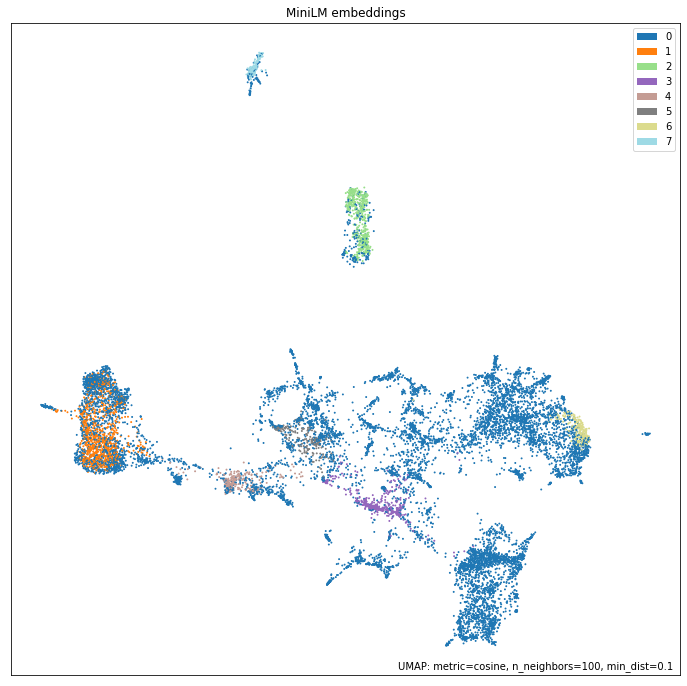

In [135]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
umap.plot.points(mapper, labels, theme="blue", ax=ax)
ax.set_title("MiniLM embeddings", fontdict={"color": "black"})
plt.savefig("./images/communities.jpg")
plt.show()

In [116]:
com_id2label = {
    0: "Политика и всякое",
    1: "Английский сегмент",
    2: "Узбекский",
    3: "Психология, саморазвитие, др.",
    4: "Инвестиции и финансы",
    5: "Работа, образование",
    6: "Новости и политика",
    7: "Спорт",
}

In [115]:
i = 1
ch_indexes = [ranker.chan_ids[x] for x in communities[i]]

ranker.meta[ranker.meta.channel_id.isin(ch_indexes)][["title", "about", "link"]].sample(30)

,title,about,link
15619,Grandle Official,Grandle’s decentralized finance capabilities u...,grandle_official
7737,VictorCrypto. Биткоин и криптовалюта,Лучший канал об инвестициях в криптовалюту! \n...,victorbavur
11985,Gun Mania Global 🌐,🔗 Website: https://gunmania.io/ \n🔊 Telegram -...,gunmania_official
13486,Crypto Nigeria 🇳🇬,"For enquiries or collaborations, please contac...",BSC_NIGERIA
14103,RugDoc Chat READ GROUP INFO. Trust no one but ...,"Welcome to RugDoc.io Chat, where we make DeFi ...",RugDocChat
15487,Crabada Official,Whitepaper: https://docs.crabada.com\n\nWebsit...,playcrabada
8273,TORUM Official ANN Channel,This is the official Telegram channel of TORUM...,torum_official
16069,🌎 Lepricon.io - Global Community,Lepricon is a blockchain-driven ecosystem of D...,lepriconio
13117,SUBME Official Chat,Subme is here to disrupt the subscription indu...,subme_cash
7859,TradeStars,TradeStars.app is the world's first Fantasy Sp...,tradestarsok
